# Boston Housing Dataset

<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/python/boston.jpg" width=1200>


The Boston data frame has 506 rows and 14 columns.This dataframe contains the following columns:


CRIM  = per capita crime rate by town.

ZN = proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS = proportion of non-retail business acres per town.

CHAS = Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

NOX = nitrogen oxides concentration (parts per 10 million).

RM = average number of rooms per dwelling.

AGE = proportion of owner-occupied units built prior to 1940.

DIS = weighted mean of distances to five Boston employment centres.

RAD = index of accessibility to radial highways.

TAX = full-value property-tax rate per $10,000.

PTRATIO = pupil-teacher ratio by town.

BLACK = 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

LSTAT = lower status of the population (percent).

price = median value of owner-occupied homes in $1000s

** Price is the TARGET variable **

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [7]:
#!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/BostonHousing.csv

In [8]:
path = 'https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/BostonHousing.csv'

In [9]:
data = pd.read_csv(path)
data.rename(columns={'medv':'Price'},inplace=True)
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
chas,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [12]:
data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
Price      0
dtype: int64

# Data Visualization

In [13]:
sns.pairplot(data)

Output hidden; open in https://colab.research.google.com to view.

CREARE VARIABILI CATEGORICHE PER VARIABILI CONTINUE E VISUALIZZARLE

In [14]:
df_cat=data.copy()

In [15]:
def get_age_category(x):
    if x < 50:
        return 'New'
    elif 50 <= x < 85:
        return 'Old'
    else:
        return 'Very_Old'

df_cat['AGE_category'] = df_cat['age'].apply(get_age_category)

In [16]:
df_cat.groupby('AGE_category').size()

AGE_category
New         147
Old         149
Very_Old    210
dtype: int64

In [17]:
df_cat['AGE_category'].value_counts()

AGE_category
Very_Old    210
Old         149
New         147
Name: count, dtype: int64

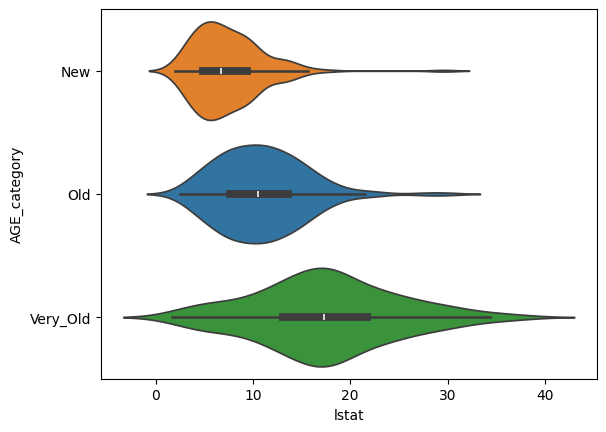

In [19]:
sns.violinplot(x='lstat', y='AGE_category', data=df_cat, order=['New', 'Old','Very_Old'],hue='AGE_category');

In [ ]:
sns.pairplot(df_cat, hue='AGE_category',hue_order=['New', 'Old','Very_Old']);

In [ ]:
############ fine esperimento

In [ ]:
# define numeric and categorical columns
num_col = data.describe().columns.tolist()
all_col = data.columns.tolist()
obj_col = [i for i in all_col if i not in num_col]

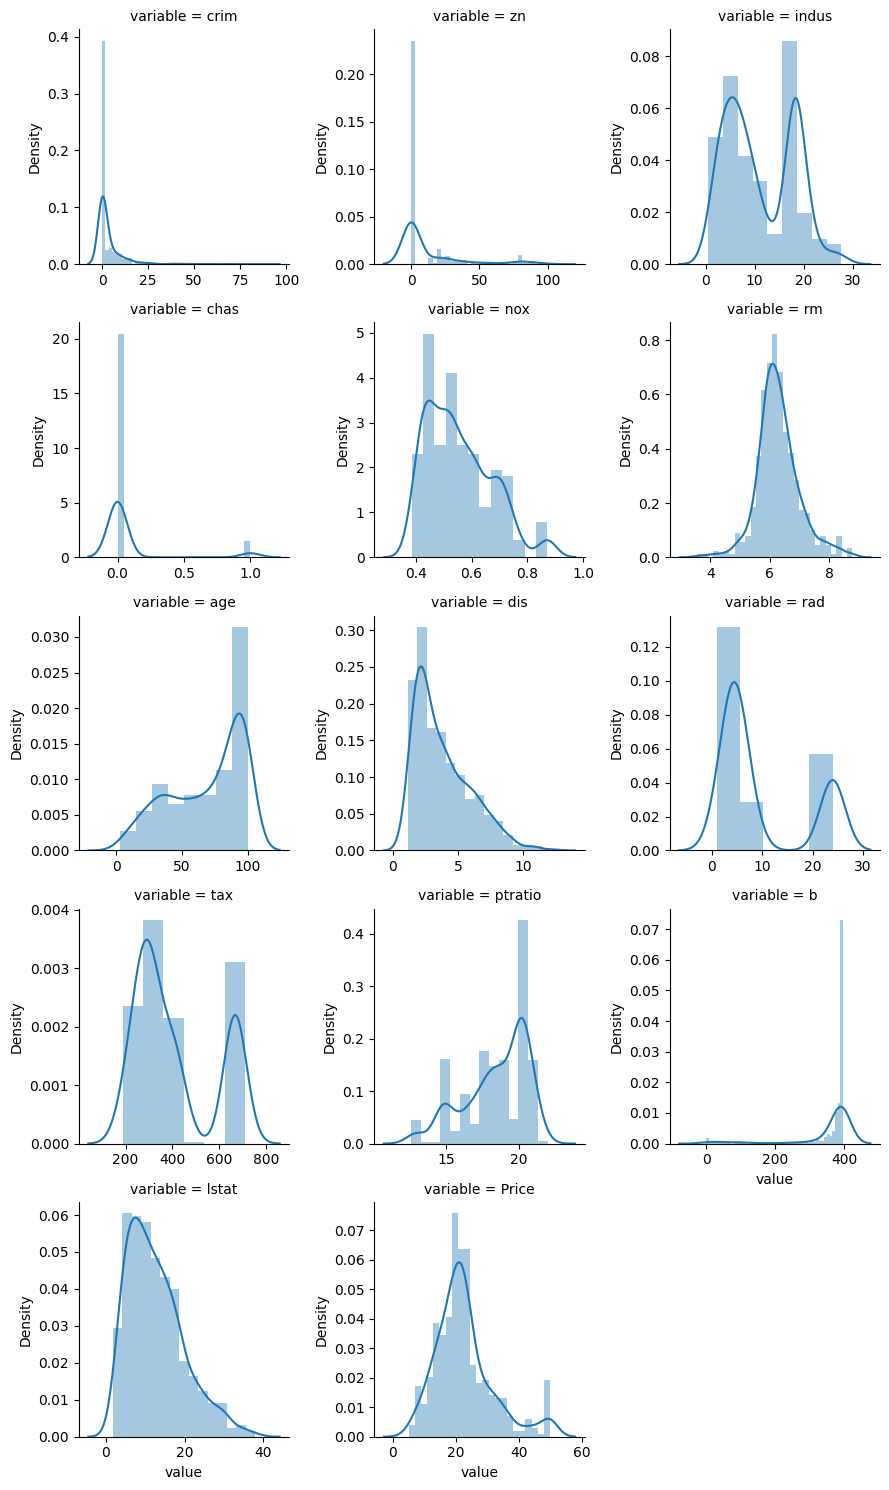

In [ ]:
def viz(df,types):
    num = df
    f = pd.melt(num, value_vars=num)
    g = sns.FacetGrid(f, col="variable",  col_wrap=3,
                      sharex=False, sharey=False)
    g = g.map(types, "value")
    plt.show()
    return (g)
# histogram visualization
viz(data[num_col], sns.distplot)

In [ ]:
!pip install klib --quiet

     |████████████████████████████████| 133 kB 25.5 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 requires jinja2<=3.0.0, but you have jinja2 3.1.2 which is incompatible.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.


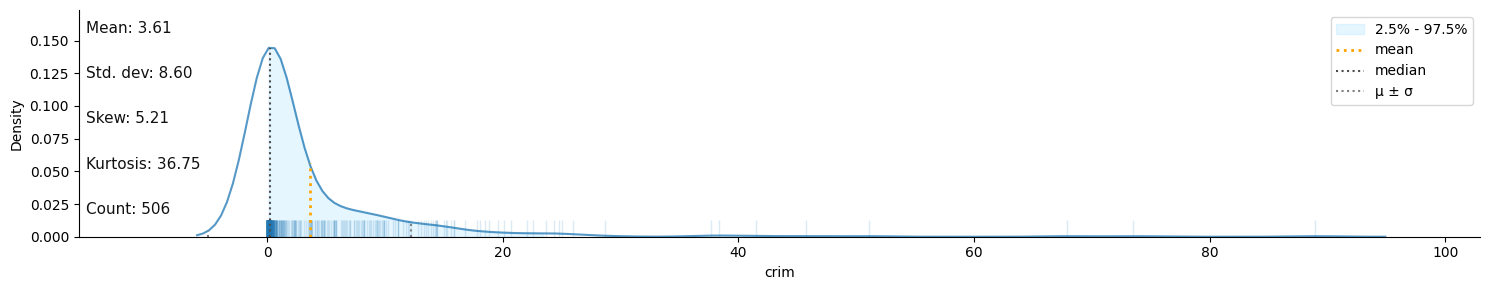

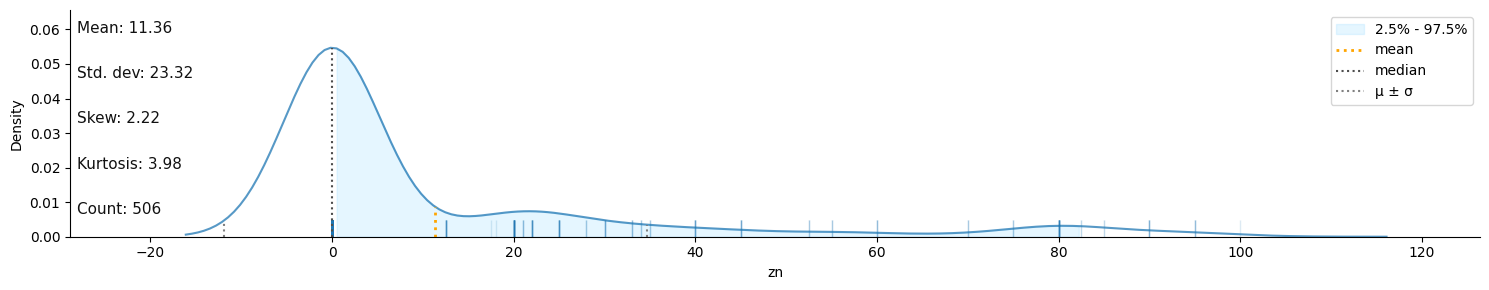

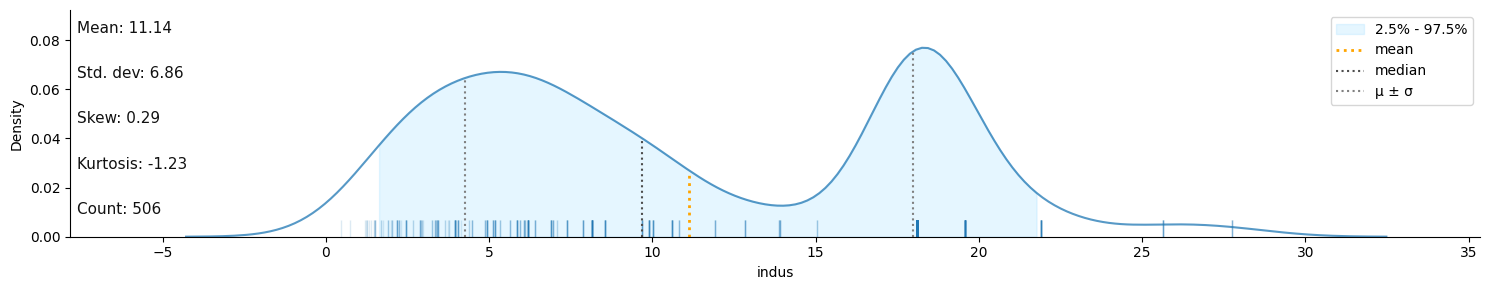

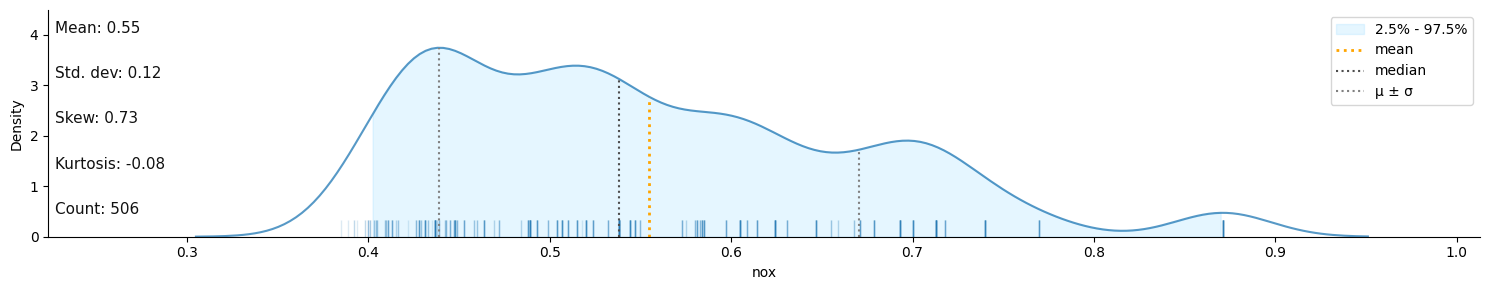

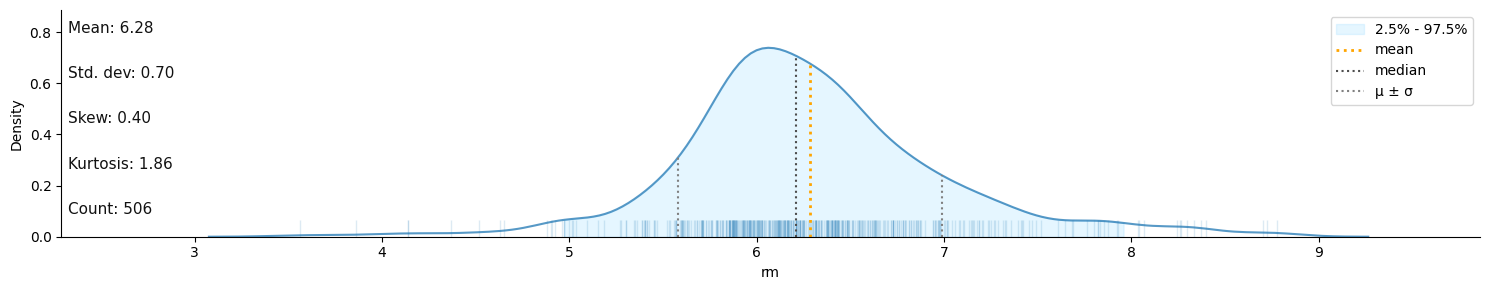

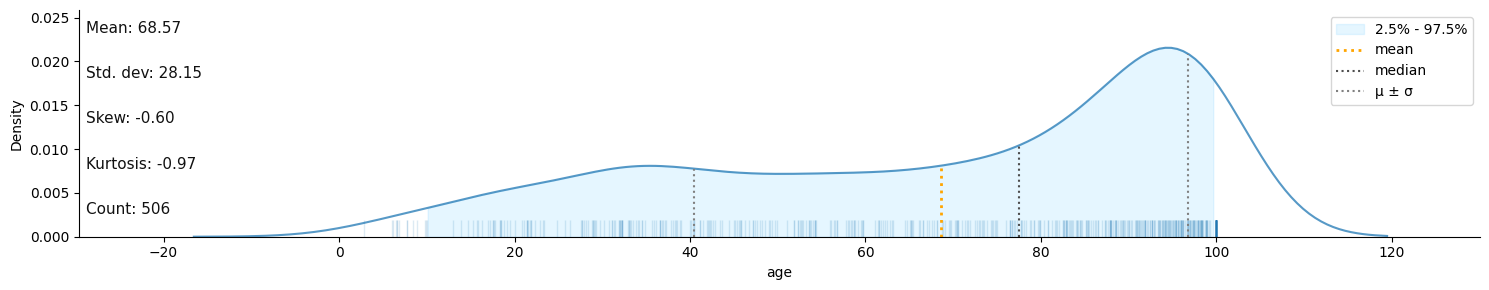

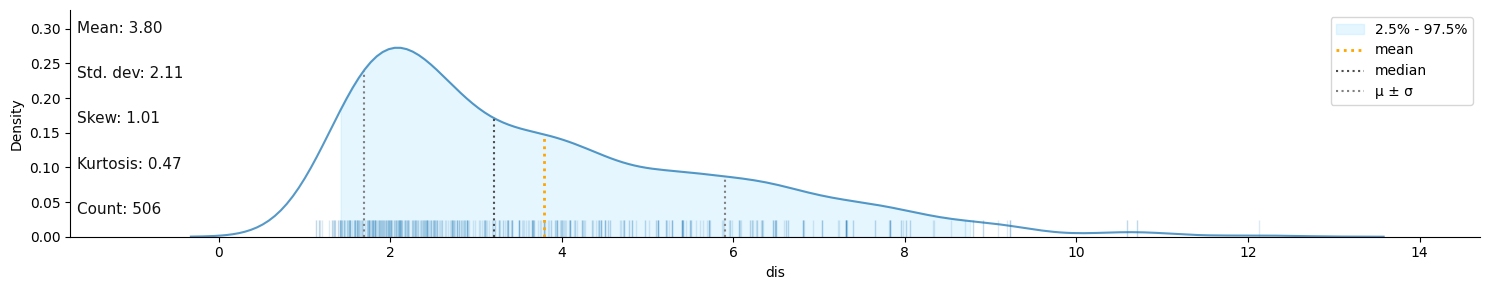

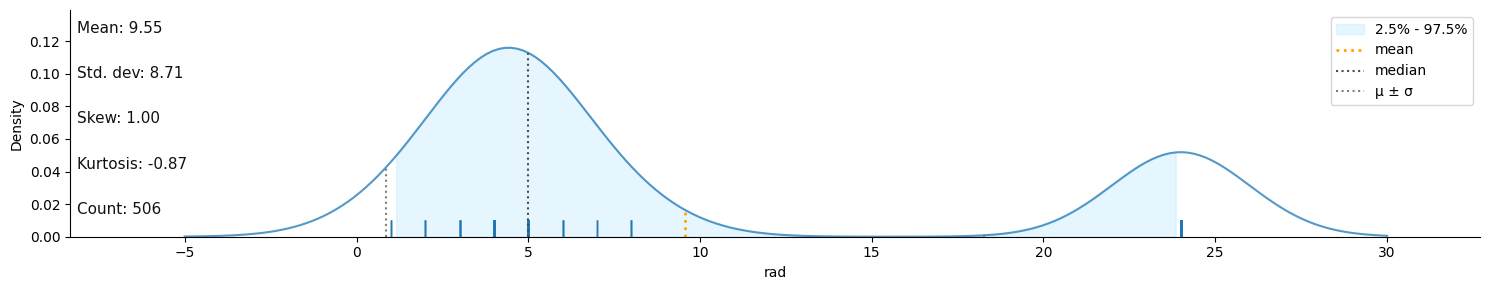

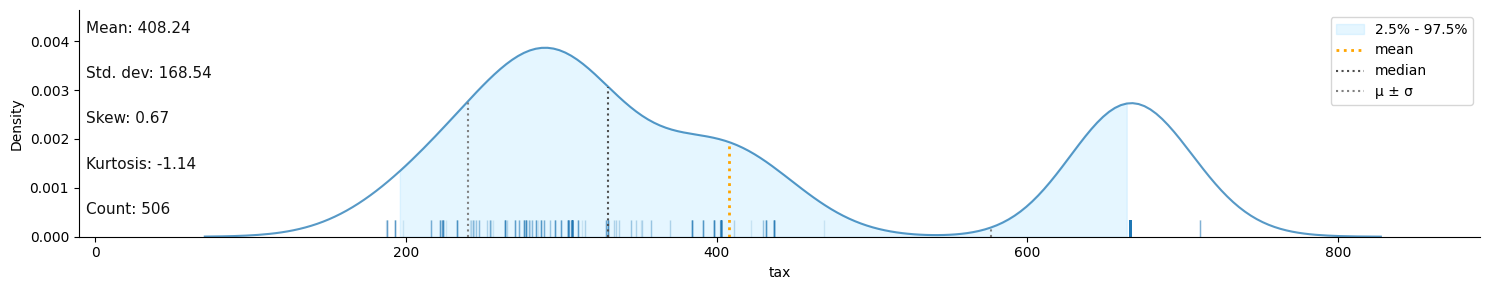

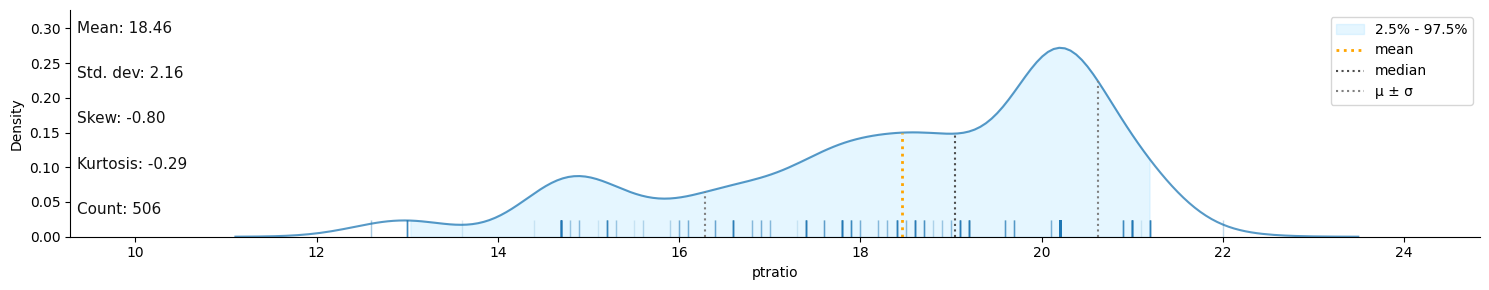

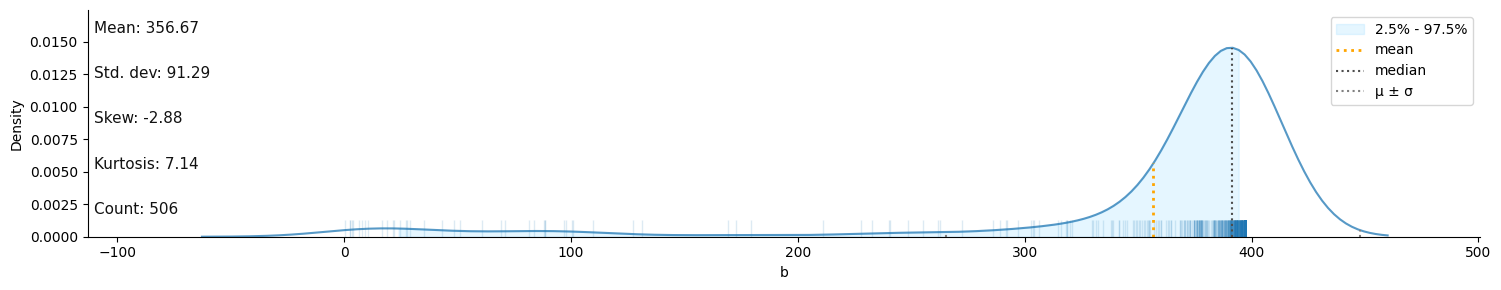

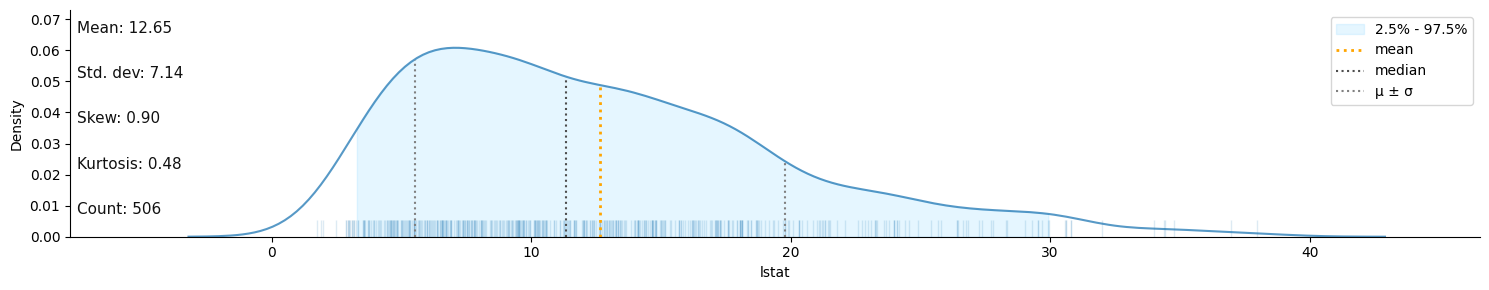

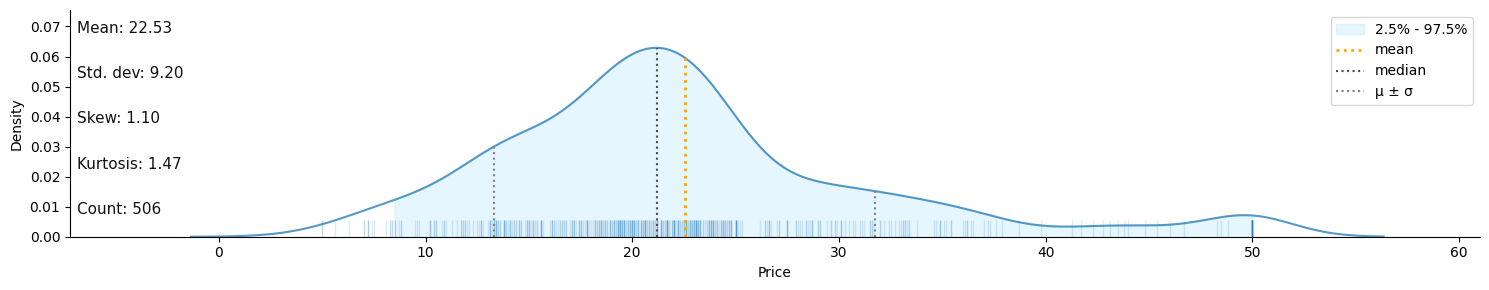

In [ ]:
import klib
klib.dist_plot(data);

In [ ]:
corrmat = data.corr()
corrmat

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,Price
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


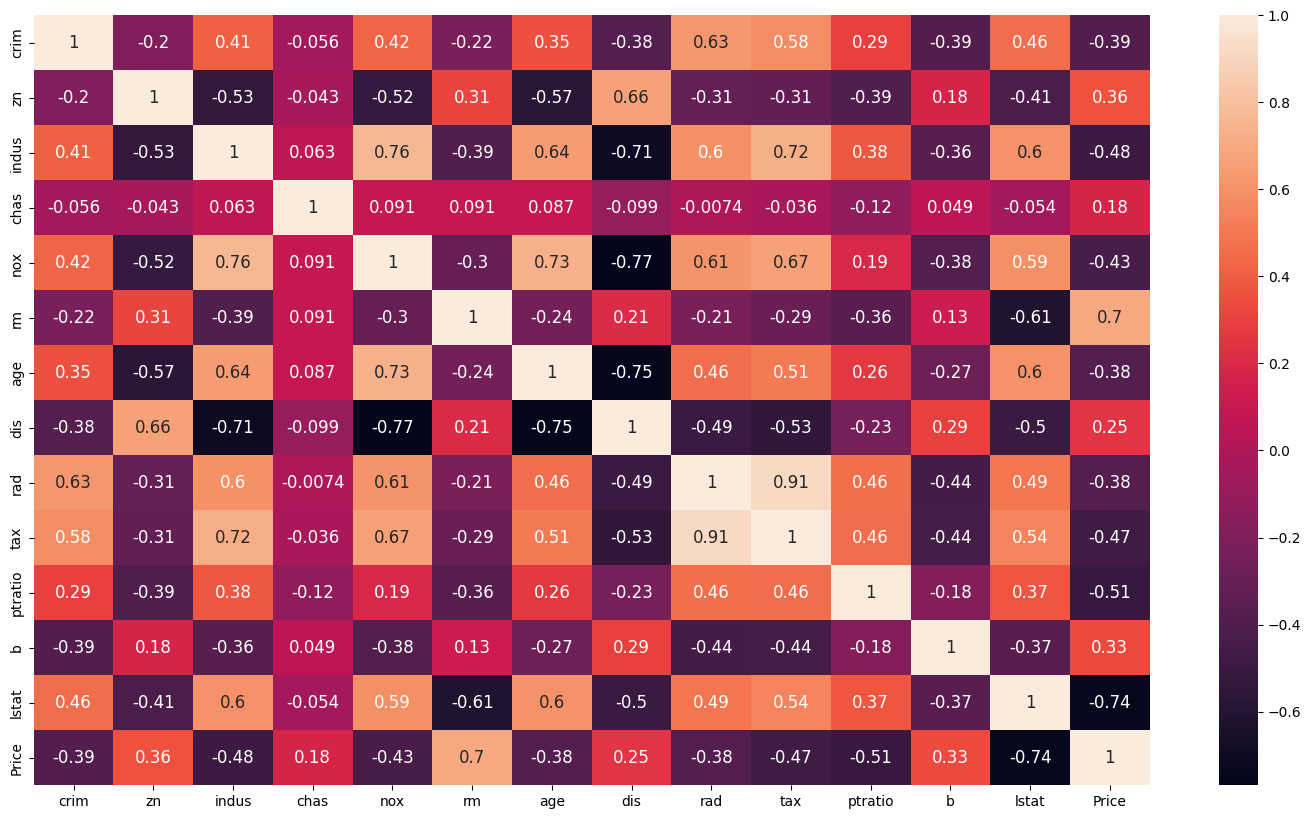

In [ ]:
plt.figure(figsize = (18, 10))
sns.heatmap(corrmat, annot = True, annot_kws={'size': 12});

In [ ]:
corrmat.index.values

array(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'b', 'lstat', 'Price'], dtype=object)

In [ ]:
##1
def getCorrelatedFeature(corrdata, threshold):
    feature = []
    value = []

    for i, index in enumerate(corrdata.index):
        if abs(corrdata[index])> threshold:
            feature.append(index)
            value.append(corrdata[index])

    df = pd.DataFrame(data = value, index = feature, columns=['Corr Value'])
    return df

In [ ]:
# Prendi la colonna Price del dataframe data, applica la treshold e includi in questo dataframe le features
threshold = 0.5
corr_value = getCorrelatedFeature(corrmat['Price'], threshold)
corr_value


,Corr Value
rm,0.695360
ptratio,-0.507787
lstat,-0.737663
Price,1.000000


In [ ]:
corr_value.index.values


array(['rm', 'ptratio', 'lstat', 'Price'], dtype=object)

In [ ]:
correlated_data = data[corr_value.index]
correlated_data

,rm,ptratio,lstat,Price
0,6.575,15.3,4.98,24.0
1,6.421,17.8,9.14,21.6
2,7.185,17.8,4.03,34.7
3,6.998,18.7,2.94,33.4
4,7.147,18.7,5.33,36.2
...,...,...,...,...
501,6.593,21.0,9.67,22.4
502,6.120,21.0,9.08,20.6
503,6.976,21.0,5.64,23.9
504,6.794,21.0,6.48,22.0


In [ ]:
correlated_data.shape

(506, 4)

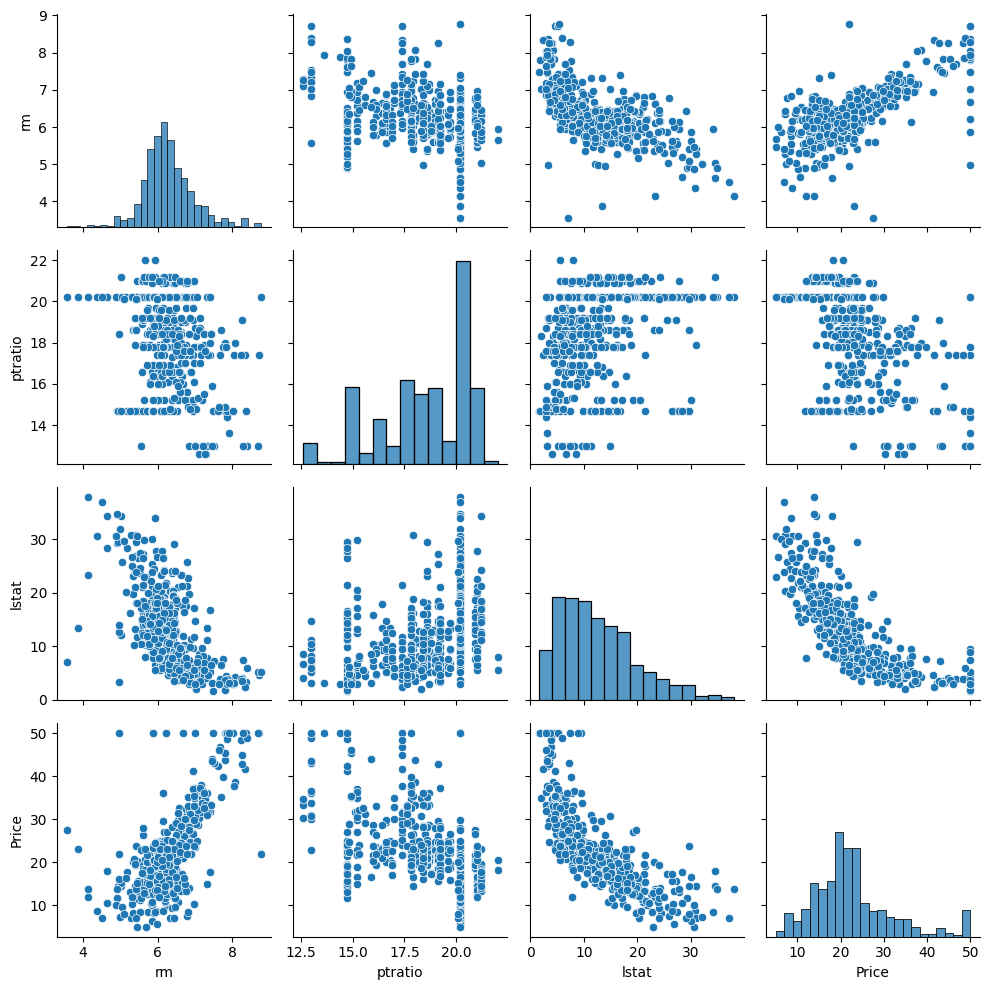

In [ ]:
sns.pairplot(correlated_data)
plt.tight_layout()

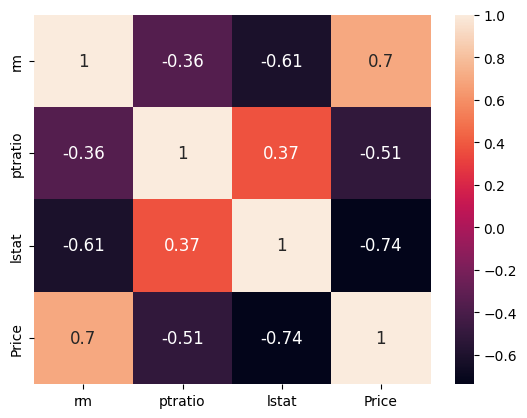

In [ ]:
sns.heatmap(correlated_data.corr(), annot=True, annot_kws={'size': 12});


## Shuffle and Split Data

In [ ]:
X = correlated_data.drop(labels=['Price'], axis = 1)
y = correlated_data['Price']
X.head()

,rm,ptratio,lstat
0,6.575,15.3,4.98
1,6.421,17.8,9.14
2,7.185,17.8,4.03
3,6.998,18.7,2.94
4,7.147,18.7,5.33


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 667
                                                    )

In [ ]:
X_train.shape, X_test.shape

((404, 3), (102, 3))

## Start train the model

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
df = pd.DataFrame(data = [y_pred, y_test])
df = df.T
df.columns = ['predetti', 'reali_test']
df

,predetti,reali_test
0,21.586200,18.7
1,20.477272,18.5
2,31.476024,29.8
3,7.318916,9.7
4,22.064810,21.7
...,...,...
97,18.903694,27.5
98,23.087278,21.4
99,16.327515,15.6
100,22.091771,29.6


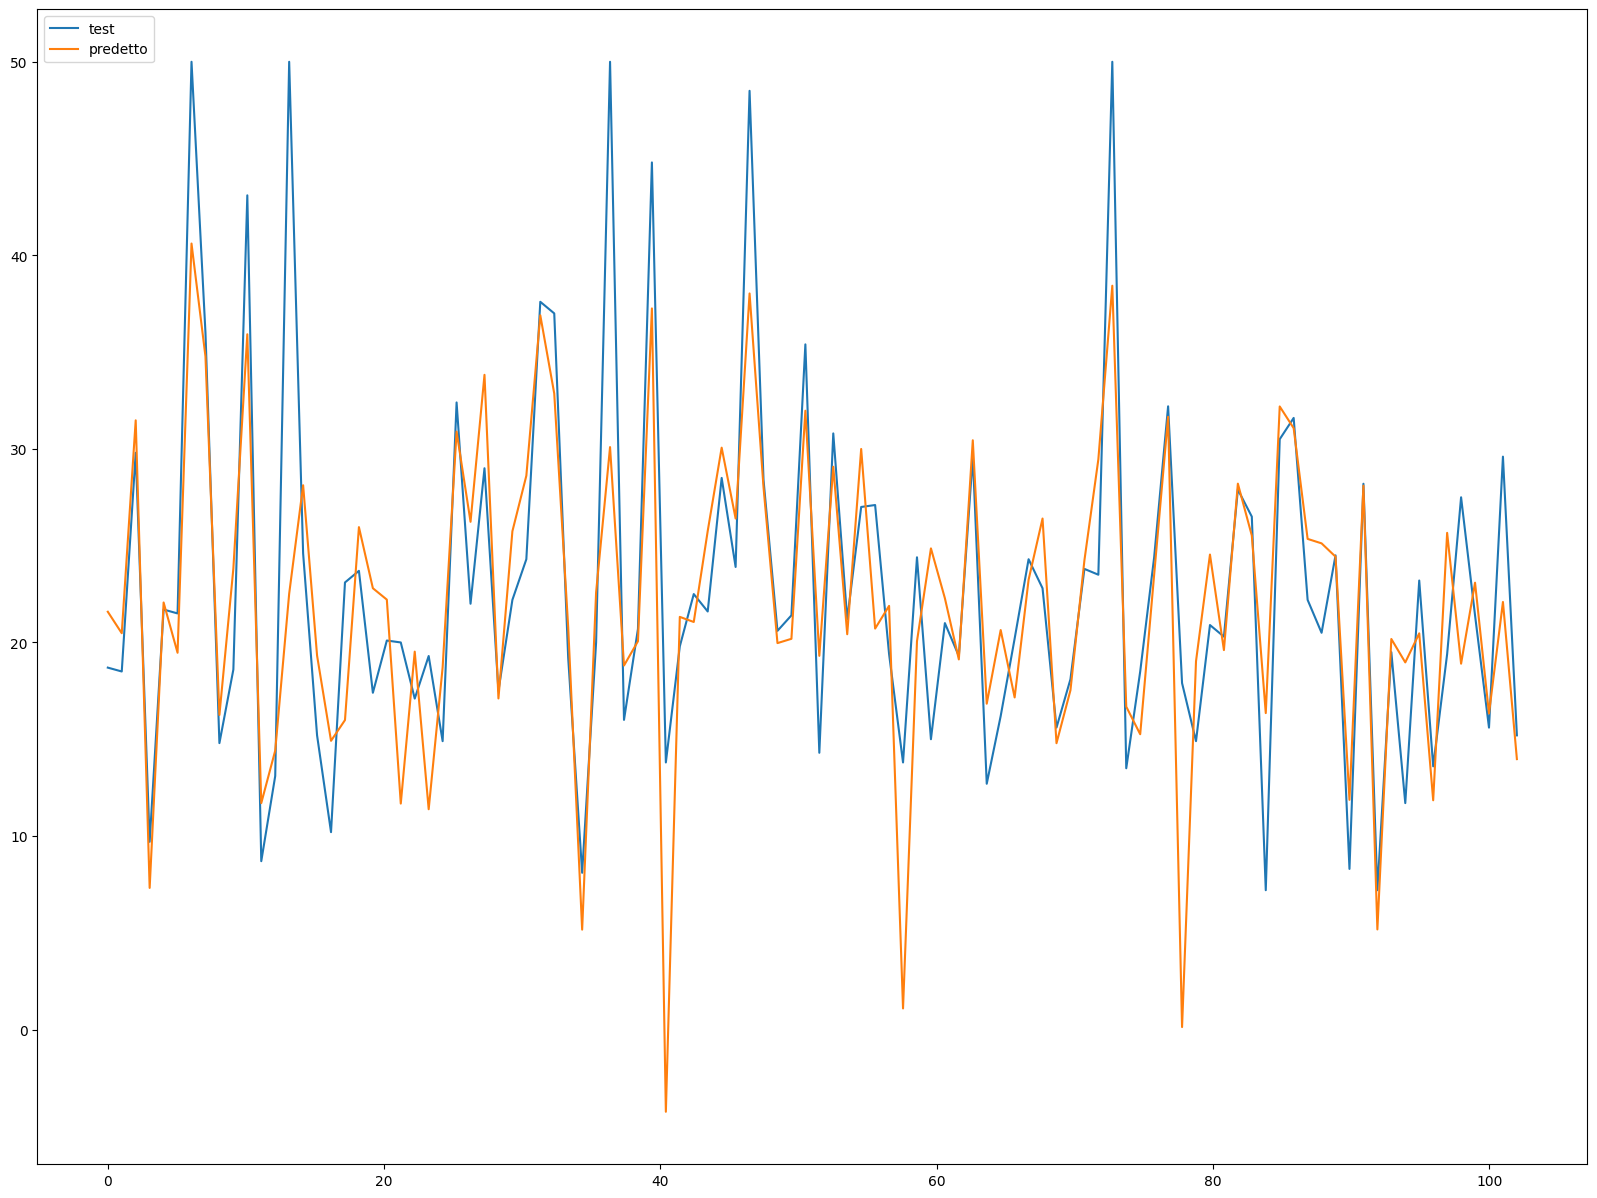

In [ ]:
length = y_pred.shape[0] #
x = np.linspace(0,length,length)


plt.figure(figsize=(20,15))
plt.plot(x, y_test, label='test')
plt.plot(x, y_pred, label='predetto')
plt.legend(loc=2);

## Defining performance metrics


It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the coefficient of determination, R2, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions.

The values for R2 range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the target variable. A model with an R2 of 0 always fails to predict the target variable, whereas a model with an R2 of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the features. A model can be given a negative R2 as well, which indicates that the model is no better than one that naively predicts the mean of the target variable.

For the performance_metric function in the code cell below, you will need to implement the following:

Use r2_score from sklearn.metrics to perform a performance calculation between y_true and y_predict. Assign the performance score to the score variable.

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

Mean Absolute Error (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$
Mean Squared Error (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$
Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$
Comparing these metrics:

MAE is the easiest to understand, because it's the average error.
MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.
All of these are loss functions, because we want to minimize them.

In [ ]:
correlated_data.columns


Index(['rm', 'ptratio', 'lstat', 'Price'], dtype='object')

In [ ]:
score = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred,squared=False)

print('r2_score: ', score)
print('mae: ', mae)
print('mse: ', mse)
print('rmse: ', rmse)

r2_score:  0.6006320504859002
mae:  4.012251060384977
mse:  35.724193953486306
rmse:  5.9769719719508725


In [ ]:
##2

total_features = []
total_features_name = []
selected_correlation_value = []
r2_scores = []
mae_value = []
mse_value = []
rmse_value = []

def performance_metrics(features, th, y_true, y_pred):
    score = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)

    total_features.append(len(features)-1)
    total_features_name.append(str(features))
    selected_correlation_value.append(th)
    r2_scores.append(score)
    mae_value.append(mae)
    mse_value.append(mse)
    rmse_value.append(rmse)

    metrics_dataframe = pd.DataFrame(data= [total_features_name, total_features, selected_correlation_value, r2_scores, mae_value, mse_value,rmse_value],
                                    index = ['features name', '#feature', 'corr_value', 'r2_score', 'MAE', 'MSE','RMSE'])
    return metrics_dataframe.T

In [ ]:
performance_metrics(correlated_data.columns.values, threshold, y_test, y_pred)

,features name,#feature,corr_value,r2_score,MAE,MSE,RMSE
0,['rm' 'ptratio' 'lstat' 'Price'],3,0.5,0.600632,4.012251,35.724194,5.976972


## regression plot of the features correlated with the price

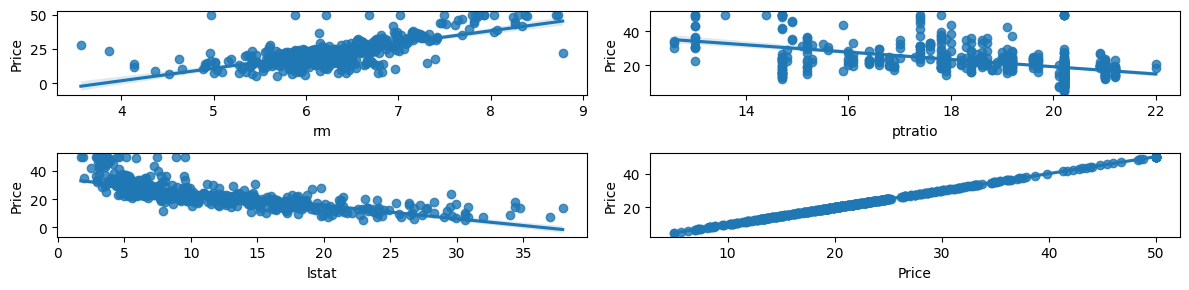

In [ ]:
rows = 2
cols = 2
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize = (12, 3))

col = correlated_data.columns
index = 0

for i in range(rows):
    for j in range(cols):
        sns.regplot(x = correlated_data[col[index]], y = correlated_data['Price'], ax = ax[i][j])
        index = index + 1
fig.tight_layout()

### Let's find out other combination of columns to get better accuracy >60%

In [ ]:
corrmat['Price']


crim      -0.388305
zn         0.360445
indus     -0.483725
chas       0.175260
nox       -0.427321
rm         0.695360
age       -0.376955
dis        0.249929
rad       -0.381626
tax       -0.468536
ptratio   -0.507787
b          0.333461
lstat     -0.737663
Price      1.000000
Name: Price, dtype: float64

In [ ]:
threshold = 0.60
corr_value = getCorrelatedFeature(corrmat['Price'], threshold)
corr_value

,Corr Value
rm,0.695360
lstat,-0.737663
Price,1.000000


In [ ]:
correlated_data = data[corr_value.index]
correlated_data.head()

,rm,lstat,Price
0,6.575,4.98,24.0
1,6.421,9.14,21.6
2,7.185,4.03,34.7
3,6.998,2.94,33.4
4,7.147,5.33,36.2


In [ ]:
##3

def get_y_predict(corr_data):
    X = corr_data.drop(labels = ['Price'], axis = 1)
    y = corr_data['Price']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred

In [ ]:
y_pred = get_y_predict(correlated_data)


In [ ]:
performance_metrics(correlated_data.columns.values, threshold, y_test, y_pred)


,features name,#feature,corr_value,r2_score,MAE,MSE,RMSE
0,['rm' 'ptratio' 'lstat' 'Price'],3,0.5,0.600632,4.012251,35.724194,5.976972
1,['rm' 'lstat' 'Price'],2,0.6,-0.796116,9.124208,160.665861,12.675404


Let's find out other combination of columns to get better accuracy >70%

In [ ]:
corrmat['Price']


crim      -0.388305
zn         0.360445
indus     -0.483725
chas       0.175260
nox       -0.427321
rm         0.695360
age       -0.376955
dis        0.249929
rad       -0.381626
tax       -0.468536
ptratio   -0.507787
b          0.333461
lstat     -0.737663
Price      1.000000
Name: Price, dtype: float64

In [ ]:
threshold = 0.70
corr_value = getCorrelatedFeature(corrmat['Price'], threshold)
corr_value

,Corr Value
lstat,-0.737663
Price,1.000000


In [ ]:
correlated_data = data[corr_value.index]
correlated_data.head()

,lstat,Price
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


In [ ]:
y_predict = get_y_predict(correlated_data)
performance_metrics(correlated_data.columns.values, threshold, y_test, y_predict)

,features name,#feature,corr_value,r2_score,MAE,MSE,RMSE
0,['rm' 'ptratio' 'lstat' 'Price'],3,0.5,0.600632,4.012251,35.724194,5.976972
1,['rm' 'lstat' 'Price'],2,0.6,-0.796116,9.124208,160.665861,12.675404
2,['lstat' 'Price'],1,0.7,-0.607914,8.844342,143.830873,11.992951


In [ ]:
threshold = 0
corr_value = getCorrelatedFeature(corrmat['Price'], threshold)
corr_value

,Corr Value
crim,-0.388305
zn,0.360445
indus,-0.483725
chas,0.175260
nox,-0.427321
rm,0.695360
age,-0.376955
dis,0.249929
rad,-0.381626
tax,-0.468536


In [ ]:
correlated_data = data[corr_value.index]
correlated_data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
y_predict = get_y_predict(correlated_data)
performance_metrics(correlated_data.columns.values, threshold, y_test, y_predict)

,features name,#feature,corr_value,r2_score,MAE,MSE,RMSE
0,['rm' 'ptratio' 'lstat' 'Price'],3,0.5,0.600632,4.012251,35.724194,5.976972
1,['rm' 'lstat' 'Price'],2,0.6,-0.796116,9.124208,160.665861,12.675404
2,['lstat' 'Price'],1,0.7,-0.607914,8.844342,143.830873,11.992951
3,['crim' 'zn' 'indus' 'chas' 'nox' 'rm' 'age' '...,13,0,-0.827234,9.221004,163.449413,12.784734


# Normalization and Standardization

Standardization = Gaussian with zero mean and unit variance.

 Z is rescaled such that any specific z will now be 0 ≤ z ≤ 1, and is done through this formula:


$$ z = \frac {x−min(x)} {max(x)−min(x)}$$

## Validation with Cross Validation

<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/fav/cross_val.png" width=800 >

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)
scores

array([ 0.72694149,  0.71485697,  0.54819014,  0.18188973, -0.02186342])

In [ ]:
np.mean(scores)

0.4300029831795567